In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Amazon_Sale_Report.csv")

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [11]:
df= df.drop(df.columns[-1],axis=1) 
df = df.drop('index', axis = 1) 

In [13]:
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN


In [15]:
df.describe()

,Qty,Amount,ship-postal-code
count,128975.000000,121180.000000,128942.000000
mean,0.904431,648.561465,463966.236509
std,0.313354,281.211687,191476.764941
min,0.000000,0.000000,110001.000000
25%,1.000000,449.000000,382421.000000
50%,1.000000,605.000000,500033.000000
75%,1.000000,788.000000,600024.000000
max,15.000000,5584.000000,989898.000000


In [17]:
df[df.duplicated()] 

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,0,NaN,NaN,Siliguri,WEST BENGAL,734008.0,IN,NaN,False,NaN
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,0,NaN,NaN,BENGALURU,KARNATAKA,560072.0,IN,NaN,False,NaN
79845,171-9628368-5329958,05-07-22,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,0,NaN,NaN,ERNAKULAM,KERALA,682017.0,IN,NaN,False,NaN
85791,171-3249942-2207542,05-03-22,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
86419,405-8669298-3850736,05-03-22,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
98955,407-4853873-4978725,06-22-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,1,INR,1163.0,Zirakpur,Punjab,140603.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


In [19]:
df = (df.drop_duplicates(keep='first').reset_index(drop=True)) # removed

In [21]:
df.isna().sum() 

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7792
Amount                 7792
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49150
B2B                       0
fulfilled-by          89692
dtype: int64

In [23]:
have_null_coll = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country','promotion-ids']
for i in have_null_coll:
    mode = df[i].mode()[0]
    df[i] = df[i].fillna(mode)
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [25]:
df.isna().sum() # now 0 missing value

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code         33
ship-country              0
promotion-ids             0
B2B                       0
fulfilled-by          89692
dtype: int64

In [29]:
IQR = df['Amount'].quantile(0.75) - df['Amount'].quantile(0.25)
1.5*IQR
upper_bound = df['Amount'].quantile(0.75) + 1.5*IQR   
lower_bound = df['Amount'].quantile(0.25) - 1.5*IQR 
Median = df['Amount'].median()
df['Amount'] = df['Amount'].apply(lambda x: Median if x > upper_bound  or x < lower_bound else x) 

In [31]:
df['Amount'] = df['Amount'].apply(lambda x: Median if x == 0 else x) 

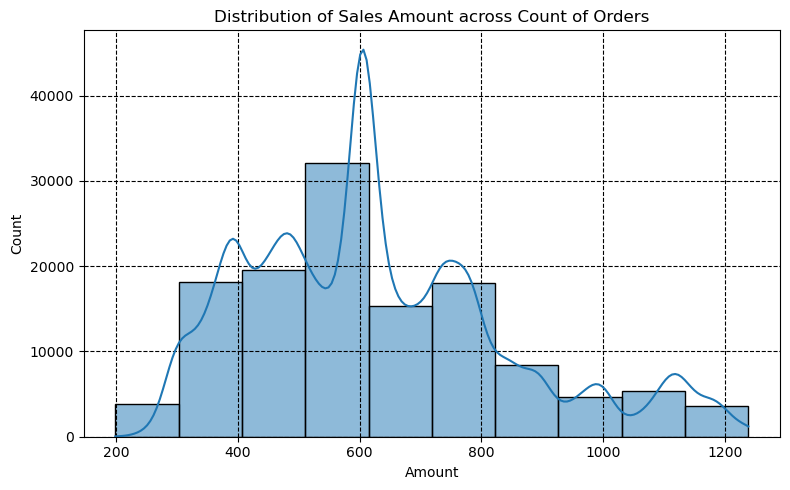

In [33]:
fig, my_ax = plt.subplots(figsize=(8,5))

sns.histplot(data = df['Amount'], ax=my_ax, binwidth=100, kde=True)
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Count of Orders")
plt.tight_layout()

In [35]:
Top5_Trending_product=df.groupby('Category')['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(5)

In [37]:
Top5_Trending_product

,Amount
Category,
Set,38581957.01
kurta,23692693.22
Western Dress,11724761.12
Top,5721433.30
Ethnic Dress,832975.66


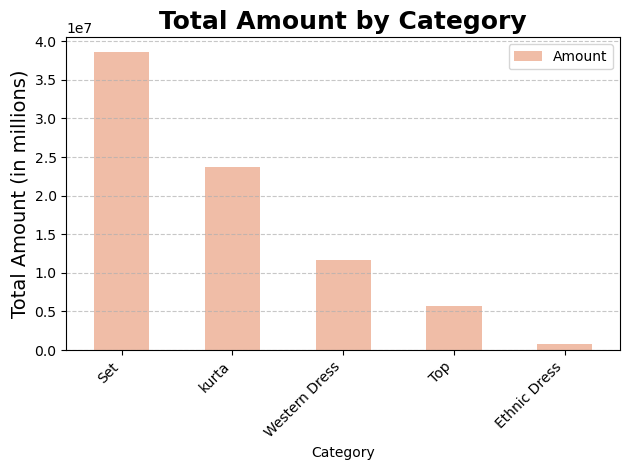

In [39]:
Top5_Trending_product.plot(kind='bar',color='#f0bda7')
plt.title('Total Amount by Category', fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
# Here the top 5 most selling product in Amazon¶


In [45]:
Top5_cities_orderfrom_Amazon=df.groupby('ship-city')['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(5)

In [47]:
Top5_cities_orderfrom_Amazon

,Amount
ship-city,
BENGALURU,7058584.03
HYDERABAD,5094404.89
MUMBAI,3802823.69
NEW DELHI,3752356.03
CHENNAI,3233757.37


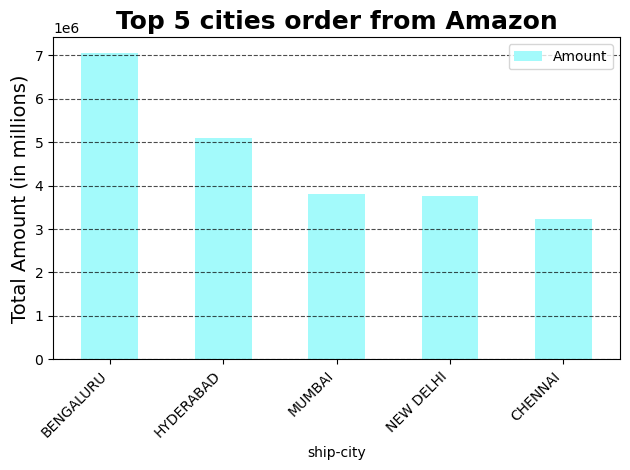

In [49]:
Top5_cities_orderfrom_Amazon.plot(kind='bar',color='#a3fafb')
plt.title('Top 5 cities order from Amazon', fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--',color='#000000', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
Total_Qty_ordered = df['Qty'].sum()

In [53]:
Total_Sales = df['Amount'].sum()

In [55]:
Sales_Order_wise = df.groupby('Order ID').agg({'Qty': 'count', 'Amount': 'sum', 'Status': 'sum', 'Fulfilment': 'sum', 'ship-service-level': 'sum', 'ship-service-level': 'sum', 'Style': 'sum', 'SKU': 'sum', 'Category': 'sum', 'ship-city': 'sum', 'ship-state': 'sum', 'B2B': 'sum', 'promotion-ids': 'sum'})

In [57]:
Sales_Order_wise

,Qty,Amount,Status,Fulfilment,ship-service-level,Style,SKU,Category,ship-city,ship-state,B2B,promotion-ids
Order ID,,,,,,,,,,,,
171-0000547-8192359,1,301.0,Shipped,Amazon,Expedited,JNE2032,JNE2032-KR-205-XL,kurta,PIMPRI CHINCHWAD,MAHARASHTRA,0,IN Core Free Shipping 2015/04/08 23-48-5-108
171-0000902-4490745,1,544.0,Cancelled,Amazon,Expedited,J0097,J0097-KR-M,kurta,Howrah,WEST BENGAL,0,IN Core Free Shipping 2015/04/08 23-48-5-108
171-0001409-6228339,1,422.0,Shipped,Amazon,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,KODAD,TELANGANA,0,IN Core Free Shipping 2015/04/08 23-48-5-108
171-0003082-5110755,1,563.0,Shipped,Amazon,Expedited,SET291,SET291-KR-PP-L,Set,GREATER NOIDA,UTTAR PRADESH,0,IN Core Free Shipping 2015/04/08 23-48-5-108
171-0003738-2052324,1,379.0,Shipped,Amazon,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,FIROZABAD,UTTAR PRADESH,0,IN Core Free Shipping 2015/04/08 23-48-5-108
...,...,...,...,...,...,...,...,...,...,...,...,...
S02-9578181-3610412,1,605.0,Shipped,Amazon,Standard,SET197,SET197-KR-NP-S,Set,Surat,Gujarat,0,IN Core Free Shipping 2015/04/08 23-48-5-108
S02-9599483-2736812,1,605.0,Shipping,Amazon,Standard,J0012,J0012-SKD-L,Set,Surat,Gujarat,0,IN Core Free Shipping 2015/04/08 23-48-5-108
S02-9649067-3246849,1,605.0,Shipped,Amazon,Standard,JNE3291,JNE3291-KR-L,kurta,Surat,Gujarat,0,IN Core Free Shipping 2015/04/08 23-48-5-108


In [59]:
Top5_seller_by_qt=Sales_Order_wise.sort_values(by='Qty', ascending = False).head(5)

In [61]:
Top5_seller_by_qt

,Qty,Amount,Status,Fulfilment,ship-service-level,Style,SKU,Category,ship-city,ship-state,B2B,promotion-ids
Order ID,,,,,,,,,,,,
403-4984515-8861958,12,5923.00,ShippedShippedShippedShippedShippedShippedShip...,AmazonAmazonAmazonAmazonAmazonAmazonAmazonAmaz...,ExpeditedExpeditedExpeditedExpeditedExpeditedE...,JNE3792JNE3764JNE3503J0308JNE3702JNE3741JNE363...,JNE3792-KR-XXXLJNE3764-KR-XXXLJNE3503-KR-XXXLJ...,kurtakurtakurtaWestern DresskurtakurtakurtaSet...,SOLAPURSOLAPURSOLAPURSOLAPURSOLAPURSOLAPURSOLA...,MAHARASHTRAMAHARASHTRAMAHARASHTRAMAHARASHTRAMA...,0,IN Core Free Shipping 2015/04/08 23-48-5-108IN...
171-5057375-2831560,12,6227.62,CancelledCancelledCancelledCancelledCancelledC...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,J0210JNE3628JNE3476J0150JNE3786SET147SET288J01...,J0210-DR-XXXLJNE3628-KR-XXXLJNE3476-KR-XXLJ015...,Ethnic DresskurtakurtakurtakurtaSetSetTopkurta...,CHENNAICHENNAICHENNAICHENNAICHENNAICHENNAICHEN...,TAMIL NADUTAMIL NADUTAMIL NADUTAMIL NADUTAMIL ...,0,IN Core Free Shipping 2015/04/08 23-48-5-108IN...
404-9932919-6662730,11,5789.00,Shipped - Delivered to BuyerShipped - Delivere...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,JNE3548JNE2100JNE3440JNE3630JNE3628SET184JNE36...,JNE3548-KR-XSJNE2100-KR-144-XSJNE3440-KR-N-XSJ...,kurtakurtakurtakurtakurtaSetkurtaSetSetSetkurta,PUNEPUNEPUNEPUNEPUNEPUNEPUNEPUNEPUNEPUNEPUNE,MAHARASHTRAMAHARASHTRAMAHARASHTRAMAHARASHTRAMA...,0,Amazon PLCC Free-Financing Universal Merchant ...
403-0173977-3041148,11,5976.00,Shipped - Delivered to BuyerShipped - Delivere...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,JNE3869JNE3720JNE3273JNE3738JNE3739JNE3861SET2...,JNE3869-DR-XXXLJNE3720-KR-XXXLJNE3273-KR-XXXLJ...,Western DresskurtakurtakurtakurtaWestern Dress...,SOLAPURSOLAPURSOLAPURSOLAPURSOLAPURSOLAPURSOLA...,MAHARASHTRAMAHARASHTRAMAHARASHTRAMAHARASHTRAMA...,0,Amazon PLCC Free-Financing Universal Merchant ...
408-3317403-1729937,10,5986.00,Shipped - Delivered to BuyerShipped - Delivere...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,JNE3437JNE3753JNE3787SET288JNE3726SET048SET220...,JNE3437-KR-XXXLJNE3753-KR-XXXLJNE3787-KR-XXXLS...,kurtakurtakurtaSetkurtaSetSetSetSetkurta,HYDERABADHYDERABADHYDERABADHYDERABADHYDERABADH...,TELANGANATELANGANATELANGANATELANGANATELANGANAT...,0,Amazon PLCC Free-Financing Universal Merchant ...


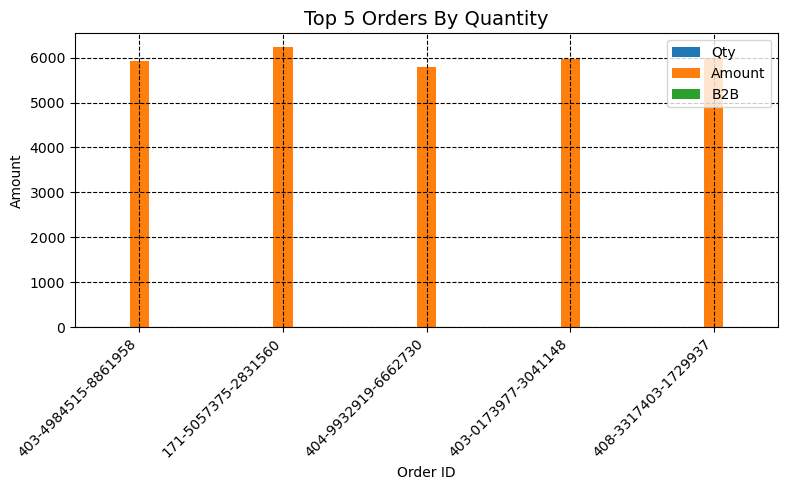

In [63]:
_, my_ax = plt.subplots(figsize=(8, 5))
Top5_seller_by_qt.plot(kind='bar', ax=my_ax, width=0.4)
plt.xticks(rotation=1, fontsize=10)
plt.grid(linestyle='--',color='#000000')
plt.title("Top 5 Orders By Quantity", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [65]:
Top5_orderby_amount=Sales_Order_wise.sort_values(by='Amount', ascending = False).head(5)

In [67]:
Top5_orderby_amount

,Qty,Amount,Status,Fulfilment,ship-service-level,Style,SKU,Category,ship-city,ship-state,B2B,promotion-ids
Order ID,,,,,,,,,,,,
406-9002076-4152331,9,6509.00,Shipped - Delivered to BuyerShipped - Delivere...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,J0308J0302SET324J0338JNE3870SET267J0339J0295J0341,J0308-DR-XXXLJ0302-DR-XXLSET324-KR-NP-XXXLJ033...,Western DressWestern DressSetWestern DressWest...,HYDERABADHYDERABADHYDERABADHYDERABADHYDERABADH...,TELANGANATELANGANATELANGANATELANGANATELANGANAT...,0,Amazon PLCC Free-Financing Universal Merchant ...
171-0706521-2133101,9,6313.00,Shipped - Delivered to BuyerShipped - Delivere...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,JNE3605SET058SET217JNE3440SET094SET233SET396JN...,JNE3605-KR-XXLSET058-KR-NP-XXLSET217-KR-PP-XXL...,kurtaSetSetkurtaSetSetSetkurtaSet,HYDERABADHYDERABADHYDERABADHYDERABADHYDERABADH...,TELANGANATELANGANATELANGANATELANGANATELANGANAT...,0,Amazon PLCC Free-Financing Universal Merchant ...
171-5057375-2831560,12,6227.62,CancelledCancelledCancelledCancelledCancelledC...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,J0210JNE3628JNE3476J0150JNE3786SET147SET288J01...,J0210-DR-XXXLJNE3628-KR-XXXLJNE3476-KR-XXLJ015...,Ethnic DresskurtakurtakurtakurtaSetSetTopkurta...,CHENNAICHENNAICHENNAICHENNAICHENNAICHENNAICHEN...,TAMIL NADUTAMIL NADUTAMIL NADUTAMIL NADUTAMIL ...,0,IN Core Free Shipping 2015/04/08 23-48-5-108IN...
404-3701762-8241125,9,6198.00,ShippedShippedShippedShippedShippedShippedShip...,AmazonAmazonAmazonAmazonAmazonAmazonAmazonAmaz...,ExpeditedExpeditedExpeditedExpeditedExpeditedE...,J0010JNE3607SET273JNE3634JNE3614SET279SET405SE...,J0010-LCD-XSJNE3607-KR-XSSET273-KR-NP-XSJNE363...,SetkurtaSetkurtakurtaSetSetSetSet,PANCHKULAPANCHKULAPANCHKULAPANCHKULAPANCHKULAP...,HARYANAHARYANAHARYANAHARYANAHARYANAHARYANAHARY...,0,IN Core Free Shipping 2015/04/08 23-48-5-108IN...
408-3317403-1729937,10,5986.00,Shipped - Delivered to BuyerShipped - Delivere...,MerchantMerchantMerchantMerchantMerchantMercha...,StandardStandardStandardStandardStandardStanda...,JNE3437JNE3753JNE3787SET288JNE3726SET048SET220...,JNE3437-KR-XXXLJNE3753-KR-XXXLJNE3787-KR-XXXLS...,kurtakurtakurtaSetkurtaSetSetSetSetkurta,HYDERABADHYDERABADHYDERABADHYDERABADHYDERABADH...,TELANGANATELANGANATELANGANATELANGANATELANGANAT...,0,Amazon PLCC Free-Financing Universal Merchant ...


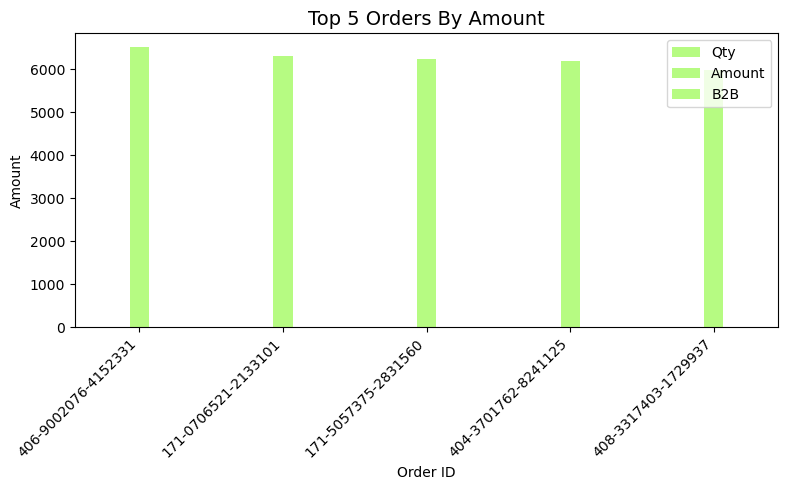

In [69]:
_, my_ax = plt.subplots(figsize=(8, 5))
Top5_orderby_amount.plot(kind='bar', ax=my_ax, width=0.4,color='#b6fb82')
plt.xticks(rotation=1, fontsize=10)
#plt.grid(color='#000000')
plt.title("Top 5 Orders By Amount", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [71]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [73]:
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Year,Month
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,2022,4
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022,4
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,2022,4


In [75]:
    Orders_date_wise = df.groupby('Date').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Amount', ascending = False).head(5)

In [77]:
Orders_date_wise

,Qty,Amount
Date,,
05-03-22,2083,1256246.02
05-04-22,2015,1252189.24
05-02-22,2079,1242425.07
04-14-22,1883,1161562.27
04-23-22,1816,1135424.62


In [79]:
  #  Top 5 quantity ordered by user¶


In [81]:
order_status=df.groupby('Status').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Qty', ascending = False)

In [83]:
order_status

,Qty,Amount
Status,,
Shipped,77801,49183878.00
Shipped - Delivered to Buyer,28769,18273278.00
Cancelled,18329,11251879.57
Shipped - Returned to Seller,1953,1239811.00
Shipped - Picked Up,973,648080.00
Pending,658,418395.00
Pending - Waiting for Pick Up,281,191075.00
Shipped - Returning to Seller,145,101676.00
Shipped - Out for Delivery,35,23807.00


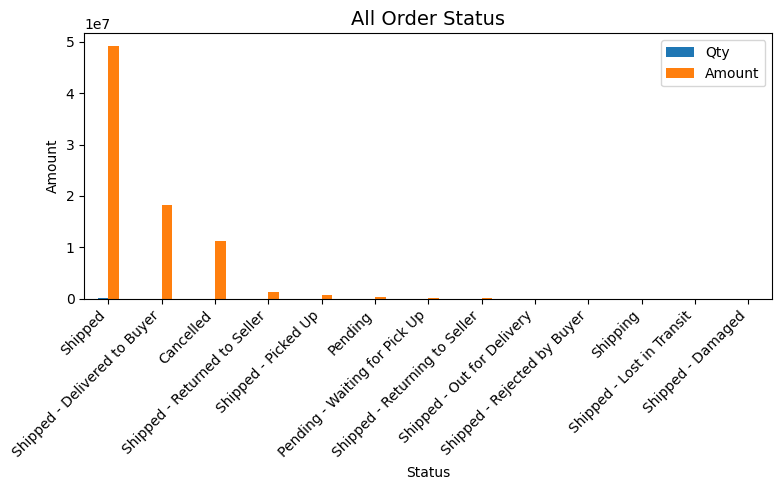

In [85]:
_, my_ax = plt.subplots(figsize=(8, 5))
order_status.plot(kind='bar', ax=my_ax, width=0.4)
plt.xticks(rotation=1, fontsize=10)
#plt.grid()
plt.title("All Order Status", fontsize=14)
plt.ylabel("Amount")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


In [87]:
Sales_month_wise = df.groupby('Month').agg({'Amount': 'sum', 'Qty': 'sum'})
Sales_month_wise

,Amount,Qty
Month,,
3,104377.85,156
4,30213124.67,44206
5,26898800.65,38009
6,24132054.40,34275


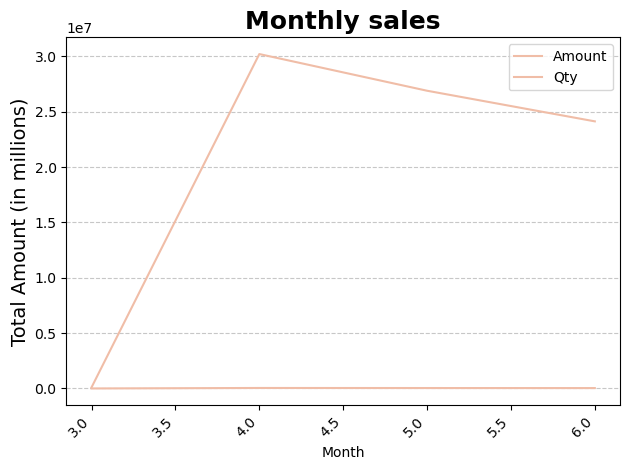

In [89]:
Sales_month_wise.plot(kind='line',color='#f0bda7')
plt.title('Monthly sales', fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
Sales_percentage_by_fulfilment = (df.groupby('Fulfilment').agg({'Qty': 'count', 'Amount': 'sum'}).sort_values(by='Amount', ascending = False)['Amount']/81352807.57)*100
Sales_percentage_by_fulfilment

Fulfilment
Amazon      69.500711
Merchant    30.493819
Name: Amount, dtype: float64

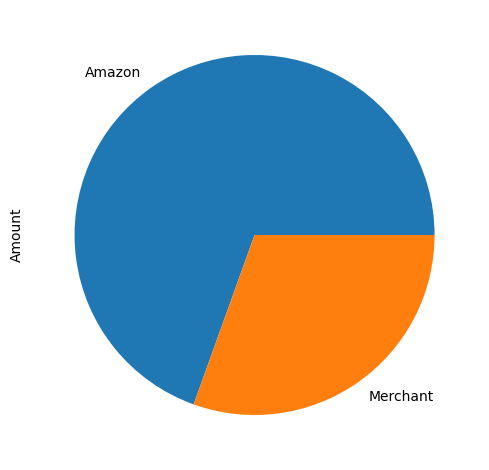

In [93]:
Sales_percentage_by_fulfilment.plot(kind='pie')
plt.tight_layout()